# Finding the EEP value that indicates MSTO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import read_mist_models
from tqdm import tqdm, trange
import pandas as pd
from astropy.io import fits

plotpar = {'axes.labelsize': 30,
           'font.size': 25,
           'legend.fontsize': 15,
           'xtick.labelsize': 25,
           'ytick.labelsize': 25,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the MIST isochrones.

In [8]:
iso = read_mist_models.ISO("data/MIST_v1.2_vvcrit0.0_UBVRIplus/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso")

Reading in: data/MIST_v1.2_vvcrit0.0_UBVRIplus/MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_UBVRIplus.iso


In [4]:
tmin, tmax = 3000, 6250
Lmin, Lmax = -1.2, 1

teffs, Ls, ages, eeps = [[] for i in range(4)]
for i, age in enumerate(tqdm(np.log10(np.linspace(.1, 13.8, 100)*1e9))):

    age_ind = iso.age_index(age) #returns the index for the desired age
    logTeff = iso.isos[age_ind]['log_Teff']
    logL = iso.isos[age_ind]['log_L']
    eep = iso.isos[age_ind]['EEP']
    age = (10**iso.isos[age_ind]["log10_isochrone_age_yr"])*1e-9
    
    teff = 10**logTeff

    m = (teff < tmax) * (tmin < teff)
    m &= (logL < Lmax) * (Lmin < logL)

    Ls.append(logL[m])
    teffs.append(teff[m])
    ages.append(age[m])
    eeps.append(eep[m])
   
teffs = np.array([i for j in teffs for i in j])
Ls = np.array([i for j in Ls for i in j])
ages = np.array([i for j in ages for i in j])
eeps = np.array([i for j in eeps for i in j])

100%|██████████| 100/100 [00:00<00:00, 3860.13it/s]


Plot the HR diagram, coloured by equivalent evolutionary point (EEP).

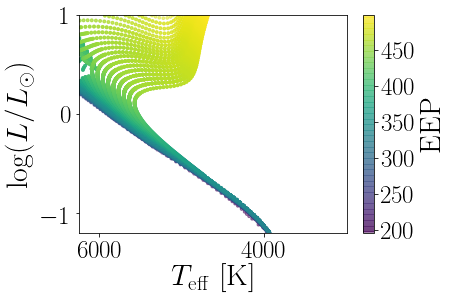

In [10]:
plt.scatter(teffs, Ls, c=eeps, s=8, alpha=.5)
    
plt.xlabel('$T_{\mathrm{eff}}~\mathrm{[K]}$')
plt.ylabel('$\log(L/L_\odot)$')

plt.xlim(tmax, tmin)
plt.ylim(Lmin, Lmax)
plt.colorbar(label="$\mathrm{EEP}$")

Find a value of EEP that serves as a suitable proxy for a gyrochronology on/off switch.

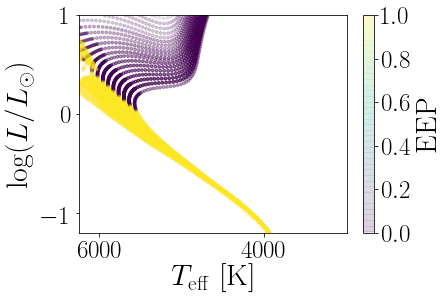

In [5]:
m = eeps > 425
bm = np.ones_like(m)
bm[m] = np.zeros_like(bm[m])
plt.scatter(teffs[::-1], Ls[::-1], c=bm[::-1], s=8, alpha=.1)
    
plt.xlabel('$T_{\mathrm{eff}}~\mathrm{[K]}$')
plt.ylabel('$\log(L/L_\odot)$')

plt.xlim(tmax, tmin)
plt.ylim(Lmin, Lmax)
plt.colorbar(label="$\mathrm{EEP}$")

We adopted a values of EEP = 425 to indicate whether a star in on the main sequence (isochrone fitting and gyrochronology is applied) or off the main sequence (only isochrone fitting is applied).